In [1]:
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from datetime import datetime
import json

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [118]:
article_df = pd.DataFrame(columns=['date','category','link'])

In [119]:
list_url = 'https://www.digitaltoday.co.kr/news/articleList.html?page={}&total=119506&box_idxno=&view_type=sm'.format(1)

article_df = pd.DataFrame(columns=['date','category','link'])

try :
    for num in range(1, 2415) :
        list_url="http://www.digitaltoday.co.kr/news/articleList.html?page={}&total=119514&sc_order_by=E".format(num)

        res = requests.get(list_url)
        soup = BeautifulSoup(res.text, 'html.parser')
        path = '#section-list ul li'
        list_select = soup.select(path)

        for i in range(len(list_select)) :
            date = list_select[i].select('em.replace-date')[0].text
            category = list_select[i].select('em.replace-section')[0].text
            link = list_select[i].select('a')[0]['href']
            data = {'date':date, 'category':category, 'link':link}
            article_df = article_df.append(data, ignore_index=True)

except :
    print('{} 페이지 오류 확인 바람'.format(num))

article_df.to_csv('article_list.csv', encoding='utf-8-sig')

In [157]:
article_df

,date,category,link
0,2021.11.02 16:01,종합,/news/articleView.html?idxno=423223
1,2021.11.02 16:00,종합,/news/articleView.html?idxno=423216
2,2021.11.02 15:59,블록체인,/news/articleView.html?idxno=423219
3,2021.11.02 15:41,종합,/news/articleView.html?idxno=423188
4,2021.11.02 15:38,산업,/news/articleView.html?idxno=423202
...,...,...,...
48255,2017.10.02 09:07,산업,/news/articleView.html?idxno=111789
48256,2017.10.02 08:57,산업,/news/articleView.html?idxno=111869
48257,2017.10.01 16:00,정보통신,/news/articleView.html?idxno=111859
48258,2017.10.01 15:24,인사,/news/articleView.html?idxno=111858


In [ ]:
for i in range(len(article_df['date'])) :
    if len(article_df['date'][i]) == 11 :
        article_df['date'][i] = '2021.'+ article_df['date'][i]

In [1]:
article_df.to_csv('article_list.csv', encoding='utf-8-sig')

NameError: name 'article_df' is not defined

In [10]:
article_df = pd.read_csv('article_list.csv', index_col =0)
article_df

,date,category,link
0,2021.11.02 16:01,종합,/news/articleView.html?idxno=423223
1,2021.11.02 16:00,종합,/news/articleView.html?idxno=423216
2,2021.11.02 15:59,블록체인,/news/articleView.html?idxno=423219
3,2021.11.02 15:41,종합,/news/articleView.html?idxno=423188
4,2021.11.02 15:38,산업,/news/articleView.html?idxno=423202
...,...,...,...
48275,2017.09.29 14:32,정보통신,/news/articleView.html?idxno=111788
48276,2017.09.29 14:30,인물/동정,/news/articleView.html?idxno=111785
48277,2017.09.29 13:27,인터넷,/news/articleView.html?idxno=111782
48278,2017.09.29 13:26,인터넷,/news/articleView.html?idxno=111781


In [4]:
article_contents_df = pd.DataFrame(columns=['idxno','title','contents'])

for k in range(len(article_df)) : 
    article_url = 'https://www.digitaltoday.co.kr{}'.format(article_df['link'][k])
    
    res = requests.get(article_url)
    soup = BeautifulSoup(res.text, 'html.parser')
    idxno = article_df['link'][k]
    title = soup.select('#article-view > div > header > h3')[0].text
    contents = soup.select('#article-view-content-div')[0].text
    
    data = {'idxno':idxno, 'title':title, 'contents':contents}
    
    article_contents_df = article_contents_df.append(data, ignore_index=True)
article_contents_df

,idxno,title,contents
0,/news/articleView.html?idxno=423223,"[데일리픽] 투자 ""주식만 있는 건 아니다""…가상자산 과세 1년 연기?","\n\n\n\n\n\n\n\n[사진: 뮤직카우]\n\n\n■ 저작권, 한우 등 이색..."
1,/news/articleView.html?idxno=423216,"과기정통부, 네트워크 안정성 대책 TF 첫 회의 가져",\n\n\n\n\n\n[디지털투데이 정유림 기자] 과학기술정보통신부는 지난 10월 ...
2,/news/articleView.html?idxno=423219,"가상자산 과세 연기되나...여당 ""1년 유예 추진""",\n\n\n여당인 더불어민주당이 가상자산 과세를 1년 유예하는 방안을 추진하고 있다...
3,/news/articleView.html?idxno=423188,AI 연구·인재 양성 싱크탱크 '인공지능 혁신 허브' 출범,\n\n\n임혜숙 과학기술정보통신부 장관이 2일 오후 서울 성북구 고려대학교 미래융...
4,/news/articleView.html?idxno=423202,"에이지엣랩스, 뮤신 콜라겐으로 이너뷰티 시장 파고든다",\n\n\n\n \n[디지털투데이 이병희 객원기자] 생명기술(BT)에 대한 기업의...
...,...,...,...
48275,/news/articleView.html?idxno=111788,"SKT, ‘웹툰 자유이용권+데이터 3GB’ 서비스 출시",\n[디지털투데이 정명섭 기자] SK텔레콤이 유료 웹툰 이용권에 추가 데이터를 제공...
48276,/news/articleView.html?idxno=111785,"SKT, ICT 전시관 티움 개관식 개최",\n[디지털투데이 정명섭 기자] SK텔레콤 최첨단 정보통신기술(ICT) 체험관 ‘티...
48277,/news/articleView.html?idxno=111782,‘배틀그라운드’ 성공가도 블루홀 조직개편 단행,\n[디지털투데이 김동규 기자] 블루홀의 신임 대표로 김효섭 현 블루홀 경영기획 실...
48278,/news/articleView.html?idxno=111781,"카카오내비, ""귀성길은 3일 오후~저녁, 귀경길은 4일 저녁 출발 추천""","\n[디지털투데이 홍하나 기자] 이번 추석 귀성길은 10월 3일 오후부터 저녁, 귀..."


In [5]:
article_contents_df.to_csv('article_contents_df.csv', encoding='utf-8-sig')

In [58]:
import matplotlib as mpl
import matplotlib.font_manager as fm

mpl.rcParams['axes.unicode_minus']= False

path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname = path, size = 50).get_name()
plt.rc('font', family=font_name)

In [2]:
article_contents_df = pd.read_csv('article_contents_df.csv', index_col=0)
article_df = pd.read_csv('article_list.csv', index_col=0)

In [3]:
article_df['date'] = pd.to_datetime(article_df['date'])
article_df.columns = ['date', 'category', 'idxno']
article_df_merge = pd.merge(article_df, article_contents_df, on='idxno')

In [88]:
article_df_merge_del = article_df_merge[article_df_merge['date'] < pd.datetime(2021,11,1)]
article_df_merge_del = article_df_merge_del[article_df_merge_del['date'] > pd.datetime(2017,9,30,23,59)]
article_df_merge_del

<ipython-input-88-72ef01dad29e>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  article_df_merge_del = article_df_merge[article_df_merge['date'] < pd.datetime(2021,11,1)]
<ipython-input-88-72ef01dad29e>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  article_df_merge_del = article_df_merge_del[article_df_merge_del['date'] > pd.datetime(2017,9,30,23,59)]


,date,category,idxno,title,contents
139,2021-10-31 17:31:00,종합,/news/articleView.html?idxno=422946,[데일리픽] G20 디지털세 도입…11월부터 ‘위드코로나’ 1단계,\n\n\n\n\n\n\n\nG20 정상회의 [사진: 디지털투데이]\n\n\n■ G...
140,2021-10-31 16:26:00,종합,/news/articleView.html?idxno=422945,"G20 정상들, 디지털세 도입 합의안 추인",\n\n\nG20 정상회의 [사진: 디지털투데이]\n\n\n[디지털투데이 문정은 기...
141,2021-10-31 13:45:00,금융·핀테크,/news/articleView.html?idxno=422941,"금융권, 고객들에 연 2회 금리인하요구권 안내",\n\n\n금융위원회 [사진: 연합뉴스]\n\n\n[디지털투데이 강진규 기자] 앞으...
142,2021-10-31 10:44:00,금융·핀테크,/news/articleView.html?idxno=422940,"기업은행, 혁신 테스트베드 'IBK 퍼스트랩' 3기 기업 모집",\n\n\nIBK기업은행이 퍼스트 랩 3기 참여기업을 모집한다. [사진: IBK기업...
143,2021-10-31 10:44:00,금융·핀테크,/news/articleView.html?idxno=422939,"하나은행, 소상공인 사이버금융범죄 피해보상보험 지원",\n\n\n하나은행이 소상공인 사이버금융범죄 피해보상보험 무상 가입 지원 서비스를 ...
...,...,...,...,...,...
48261,2017-10-02 09:07:00,산업,/news/articleView.html?idxno=111789,"[단독] 삼성SDI, 헝가리 공장에 배터리 신공정 도입",\n[디지털투데이 박찬길 기자] 삼성SDI가 내년 상반기 양산 가동 예정인 헝가리 ...
48262,2017-10-02 08:57:00,산업,/news/articleView.html?idxno=111869,길 안내만 하는 내비게이션은 '옛 이야기'...AI·빅데이터 첨단기술 무장,\n[디지털투데이 정명섭 기자] 우리나라 민족 고유의 명절 추석은 귀성 인파가 몰려...
48263,2017-10-01 16:00:00,정보통신,/news/articleView.html?idxno=111859,"단통법 지원금 상한제 폐지 첫날, KT '갤럭시J7' 첫 수혜","\n[디지털투데이 백연식 기자] 지원금 상한제가 폐지된 첫 날(1일) SK텔레콤, ..."
48264,2017-10-01 15:24:00,인사,/news/articleView.html?idxno=111858,[인사] 방송통신위원회,\n◇실장급 전보 ▲사무처장 조경식


In [84]:
from konlpy.tag import Komoran, Okt, Kkma, Hannanum

kor = Komoran()
okt = Okt()
kkma = Kkma()
han = Hannanum()

In [103]:
article_df_merge_del_2021 = article_df_merge_del[article_df_merge_del['date'] > pd.datetime(2020,12,31,23,59)]

<ipython-input-103-3073703528f5>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  article_df_merge_del_2021 = article_df_merge_del[article_df_merge_del['date'] > pd.datetime(2020,12,31,23,59)]


In [112]:
article_df_merge_del_2021.reset_index(drop=True, inplace=True)

In [115]:
article_df_merge_del_2021['contents'].iloc[0]

"\n\n\n\n\n\n\n\nG20 정상회의 [사진: 디지털투데이]\n\n\n■ G20 정상들, 디지털세 도입 합의\n주요 20개국(G20) 정상들이 로마에서 열린 정상회의에서 디지털세 합의안을 추인했다고 외신들이 보도했다.\n디지털세 합의안은 \xa0'매출발생국 과세권 배분'과 '글로벌 최저한세 도입'으로 구성된다.\n매출발생국 과세권 배분은 연간 기준 연결매출액이 200억유로, 약 27조원, 이익률이 10% 이상인 대기업 매출에 대한 과세권을 시장 소재국에 배분한다는 내용이다.\xa0\n적용 대상 기업은 2023년부터 글로벌 매출 가운데 통상이익률 10%를 웃도는 초과 이익의 25%에 대한 세금을 각 시장 소재국에 내야 한다.\n글로벌 최저한세는 2023년부터 연결매출액이 7억5000만유로 약 1조원 이상인 다국적 기업에 대해 15%의 글로벌 최저한세율을 적용하기로 한 내용이다.\xa0\n어느 국가에서 사업을 하더라도 15% 이상의 세금을 내야 한다. 디지털세 시행 시점은 2023년이다.\xa0\n■ 편의점 점포 내놓은 '신한·하나\n시중은행이 유통업계와 손잡고 '편의점 은행'을 속속 선보이고 있다. 은행권 점포 축소로 인한 금융소외계층 피해를 최소화하고 생활금융 서비스 경쟁력을 높이기 위한 행보다.\n이달 하나은행은 BGF리테일과 금융 업무 처리가 가능한 CU마천파크점을 연데 이어 신한은행은 GS리테일과 강원 정선군 고한읍에 GS25편의점 혁신점포 1호점을 열었다.\n두 은행은 공통적으로 편의점 은행을 통해 비대면 금융 확산으로 인한 금융 소외층을 포용하겠다는 목적을 갖고 있다.\xa0\n최근 모바일뱅킹 등 비대면 거래가 확대됨에 따라 은행들은 기존 점포를 줄여나가고 있다.\n앞으로도 편의점을 오프라인 인프라로 활용하는 금융권들은 지속 나올 것으로 예상된다.\xa0\n이미 일본의 대표적인 편의점인 '세븐일레븐'을 중심으로 설립된 세븐은행은 세븐일레븐 점포를 활용해 언제나 사용할 수 있는 ATM 네트워크를 구축하고 정기예금 가입, 해외송금 등을 가능케 했

In [142]:
kor_nouns = kor.nouns("\n".join([s for s in article_df_merge_del_2021['contents'].iloc[0].split("\n") if s]))
okt_nouns = okt.nouns(article_df_merge_del_2021['contents'].iloc[0])

In [143]:
kkma_nouns = kkma.nouns(article_df_merge_del_2021['contents'].iloc[0])
han_nouns = han.nouns(article_df_merge_del_2021['contents'].iloc[0])

In [198]:
import re

def text_clean(doc):
    doc =re.sub("[^a-zA-Zㄱ-ㅎㅏ-ㅣ가-힣 ]", "", doc)
    return doc

In [224]:
text_clean(article_df_merge_del_2021['contents'].iloc[0])

'G 정상회의 사진 디지털투데이 G 정상들 디지털세 도입 합의주요 개국G 정상들이 로마에서 열린 정상회의에서 디지털세 합의안을 추인했다고 외신들이 보도했다디지털세 합의안은 매출발생국 과세권 배분과 글로벌 최저한세 도입으로 구성된다매출발생국 과세권 배분은 연간 기준 연결매출액이 억유로 약 조원 이익률이  이상인 대기업 매출에 대한 과세권을 시장 소재국에 배분한다는 내용이다적용 대상 기업은 년부터 글로벌 매출 가운데 통상이익률 를 웃도는 초과 이익의 에 대한 세금을 각 시장 소재국에 내야 한다글로벌 최저한세는 년부터 연결매출액이 억만유로 약 조원 이상인 다국적 기업에 대해 의 글로벌 최저한세율을 적용하기로 한 내용이다어느 국가에서 사업을 하더라도  이상의 세금을 내야 한다 디지털세 시행 시점은 년이다 편의점 점포 내놓은 신한하나시중은행이 유통업계와 손잡고 편의점 은행을 속속 선보이고 있다 은행권 점포 축소로 인한 금융소외계층 피해를 최소화하고 생활금융 서비스 경쟁력을 높이기 위한 행보다이달 하나은행은 BGF리테일과 금융 업무 처리가 가능한 CU마천파크점을 연데 이어 신한은행은 GS리테일과 강원 정선군 고한읍에 GS편의점 혁신점포 호점을 열었다두 은행은 공통적으로 편의점 은행을 통해 비대면 금융 확산으로 인한 금융 소외층을 포용하겠다는 목적을 갖고 있다최근 모바일뱅킹 등 비대면 거래가 확대됨에 따라 은행들은 기존 점포를 줄여나가고 있다앞으로도 편의점을 오프라인 인프라로 활용하는 금융권들은 지속 나올 것으로 예상된다이미 일본의 대표적인 편의점인 세븐일레븐을 중심으로 설립된 세븐은행은 세븐일레븐 점포를 활용해 언제나 사용할 수 있는 ATM 네트워크를 구축하고 정기예금 가입 해외송금 등을 가능케 했다 네이버카카오 AI 베팅 지속국내 양대 인터넷 기업 네이버와 카카오가 인공지능 관련 투자를 이어가고 있다카카오 인공지능 연구 자회사 카카오브레인은 최근 취업 연계형 주니어 육성 프로그램 카카오브레인 패스파인더를 열고 두 자릿수 규모 지원자 모집을 시작했다인재 육성을 목표로 다

In [ ]:
# for i in range(len(article_df_merge_del_2021)) :
kot_nouns_zip = []
okt_nouns_zip = []

for i in range(len(article_df_merge_del_2021)) :
    kor_nouns = kor.nouns("\n".join([s for s in text_clean(article_df_merge_del_2021['contents'].iloc[i]).split("\n") if s]))
    okt_nouns = okt.nouns(text_clean(article_df_merge_del_2021['contents'].iloc[i]))
    
    kot_nouns_zip = kot_nouns_zip + kor_nouns
    okt_nouns_zip = okt_nouns_zip + okt_nouns
#     kor_text = Text(kor_nouns)
#     okt_text = Text(okt_nouns)
    
#     if [dict(kor_text.vocab() + okt_text.vocab()).keys()] not in [dict_2021.keys()] :
#         dict_2021.update(dict(kor_text.vocab() + okt_text.vocab()))

kor_text = Text(kor_nouns)
okt_text = Text(okt_nouns)

In [245]:
font_path = '‪‪C:/Windows/Fonts/gulim.ttc'
wc = WordCloud(font_path=font_path)

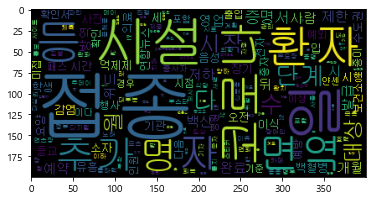

In [246]:
plt.imshow(wc.generate_from_frequencies(dict(kor_text.vocab())))
plt.show()

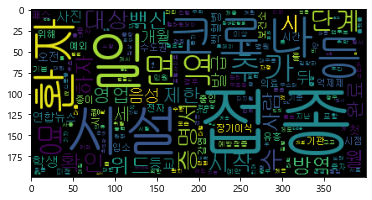

In [247]:
plt.imshow(wc.generate_from_frequencies(dict(okt_text.vocab())))
plt.show()

In [165]:
okt_text.vocab()

FreqDist({'배터리': 11, '기업': 10, '증권': 10, '리튬': 8, '인산': 8, '철': 8, '디지털': 7, '거래소': 7, '세': 6, '편의점': 6, ...})

In [166]:
kkma_text.vocab()

FreqDist({'일': 3, '세': 2, '만': 2, '수': 2, '이': 2, '위': 2, '시': 2, '20': 1, '정상': 1, '정상회의': 1, ...})

In [167]:
han_text.vocab()

FreqDist({'배터리': 11, '■': 7, '기업': 7, '리튬인산철': 7, '수': 6, '중국': 6, '베이징': 6, '증권거래소': 6, '편의점': 5, '등': 5, ...})

In [25]:
a = article_df_merge.groupby([article_df_merge['date'].dt.year, article_df_merge['date'].dt.month])

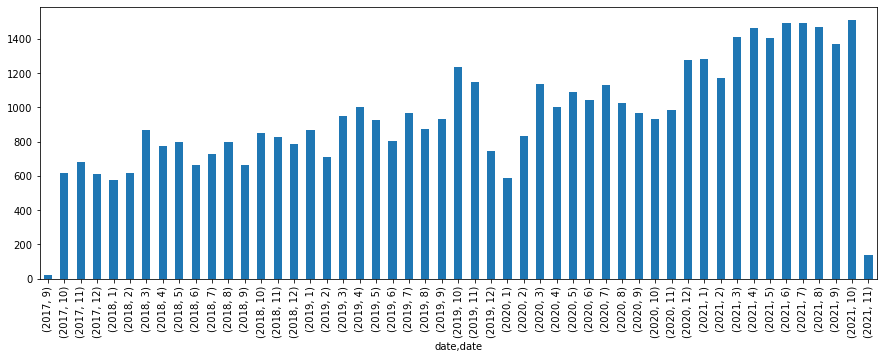

In [51]:
plt.figure(figsize=(15,5))
a['date'].count().plot(kind='bar')
plt.show()

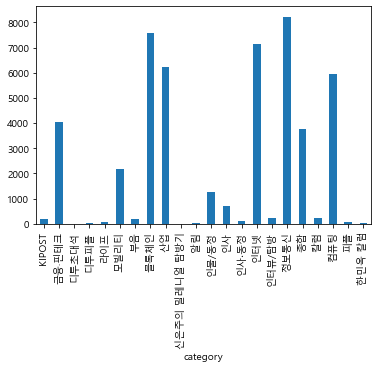

<Figure size 1080x360 with 0 Axes>

In [59]:
article_df_merge.groupby(article_df_merge['category'])['category'].count().plot(kind='bar')
plt.figure(figsize=(15,5))
plt.show()

,date,category,idxno,title,contents
0,2021-11-02 16:01:00,종합,/news/articleView.html?idxno=423223,"[데일리픽] 투자 ""주식만 있는 건 아니다""…가상자산 과세 1년 연기?","\n\n\n\n\n\n\n\n[사진: 뮤직카우]\n\n\n■ 저작권, 한우 등 이색..."
1,2021-11-02 16:00:00,종합,/news/articleView.html?idxno=423216,"과기정통부, 네트워크 안정성 대책 TF 첫 회의 가져",\n\n\n\n\n\n[디지털투데이 정유림 기자] 과학기술정보통신부는 지난 10월 ...
2,2021-11-02 15:59:00,블록체인,/news/articleView.html?idxno=423219,"가상자산 과세 연기되나...여당 ""1년 유예 추진""",\n\n\n여당인 더불어민주당이 가상자산 과세를 1년 유예하는 방안을 추진하고 있다...
3,2021-11-02 15:41:00,종합,/news/articleView.html?idxno=423188,AI 연구·인재 양성 싱크탱크 '인공지능 혁신 허브' 출범,\n\n\n임혜숙 과학기술정보통신부 장관이 2일 오후 서울 성북구 고려대학교 미래융...
4,2021-11-02 15:38:00,산업,/news/articleView.html?idxno=423202,"에이지엣랩스, 뮤신 콜라겐으로 이너뷰티 시장 파고든다",\n\n\n\n \n[디지털투데이 이병희 객원기자] 생명기술(BT)에 대한 기업의...
...,...,...,...,...,...
48281,2017-09-29 14:32:00,정보통신,/news/articleView.html?idxno=111788,"SKT, ‘웹툰 자유이용권+데이터 3GB’ 서비스 출시",\n[디지털투데이 정명섭 기자] SK텔레콤이 유료 웹툰 이용권에 추가 데이터를 제공...
48282,2017-09-29 14:30:00,인물/동정,/news/articleView.html?idxno=111785,"SKT, ICT 전시관 티움 개관식 개최",\n[디지털투데이 정명섭 기자] SK텔레콤 최첨단 정보통신기술(ICT) 체험관 ‘티...
48283,2017-09-29 13:27:00,인터넷,/news/articleView.html?idxno=111782,‘배틀그라운드’ 성공가도 블루홀 조직개편 단행,\n[디지털투데이 김동규 기자] 블루홀의 신임 대표로 김효섭 현 블루홀 경영기획 실...
48284,2017-09-29 13:26:00,인터넷,/news/articleView.html?idxno=111781,"카카오내비, ""귀성길은 3일 오후~저녁, 귀경길은 4일 저녁 출발 추천""","\n[디지털투데이 홍하나 기자] 이번 추석 귀성길은 10월 3일 오후부터 저녁, 귀..."


In [66]:
from konlpy.tag import Komoran, Okt, Kkma, Hannanum

kor = Komoran()
okt = Okt()
# mecab = Mecab()
kkma = Kkma()
han = Hannanum()

In [72]:
a['contents']

In [ ]:
article_df_2021 = article_df[article_df['date'].dt.year == 2021]

In [18]:
article_df_merge

,date,catrgory,idxno,title,contents
0,2021-11-02 16:01:00,종합,/news/articleView.html?idxno=423223,"[데일리픽] 투자 ""주식만 있는 건 아니다""…가상자산 과세 1년 연기?","\n\n\n\n\n\n\n\n[사진: 뮤직카우]\n\n\n■ 저작권, 한우 등 이색..."
1,2021-11-02 16:00:00,종합,/news/articleView.html?idxno=423216,"과기정통부, 네트워크 안정성 대책 TF 첫 회의 가져",\n\n\n\n\n\n[디지털투데이 정유림 기자] 과학기술정보통신부는 지난 10월 ...
2,2021-11-02 15:59:00,블록체인,/news/articleView.html?idxno=423219,"가상자산 과세 연기되나...여당 ""1년 유예 추진""",\n\n\n여당인 더불어민주당이 가상자산 과세를 1년 유예하는 방안을 추진하고 있다...
3,2021-11-02 15:41:00,종합,/news/articleView.html?idxno=423188,AI 연구·인재 양성 싱크탱크 '인공지능 혁신 허브' 출범,\n\n\n임혜숙 과학기술정보통신부 장관이 2일 오후 서울 성북구 고려대학교 미래융...
4,2021-11-02 15:38:00,산업,/news/articleView.html?idxno=423202,"에이지엣랩스, 뮤신 콜라겐으로 이너뷰티 시장 파고든다",\n\n\n\n \n[디지털투데이 이병희 객원기자] 생명기술(BT)에 대한 기업의...
...,...,...,...,...,...
48281,2017-09-29 14:32:00,정보통신,/news/articleView.html?idxno=111788,"SKT, ‘웹툰 자유이용권+데이터 3GB’ 서비스 출시",\n[디지털투데이 정명섭 기자] SK텔레콤이 유료 웹툰 이용권에 추가 데이터를 제공...
48282,2017-09-29 14:30:00,인물/동정,/news/articleView.html?idxno=111785,"SKT, ICT 전시관 티움 개관식 개최",\n[디지털투데이 정명섭 기자] SK텔레콤 최첨단 정보통신기술(ICT) 체험관 ‘티...
48283,2017-09-29 13:27:00,인터넷,/news/articleView.html?idxno=111782,‘배틀그라운드’ 성공가도 블루홀 조직개편 단행,\n[디지털투데이 김동규 기자] 블루홀의 신임 대표로 김효섭 현 블루홀 경영기획 실...
48284,2017-09-29 13:26:00,인터넷,/news/articleView.html?idxno=111781,"카카오내비, ""귀성길은 3일 오후~저녁, 귀경길은 4일 저녁 출발 추천""","\n[디지털투데이 홍하나 기자] 이번 추석 귀성길은 10월 3일 오후부터 저녁, 귀..."


In [18]:
article_df10['date'] = pd.to_datetime(article_df10['date'])
article_df10['date']

0   2021-11-02 16:01:00
1   2021-11-02 16:00:00
2   2021-11-02 15:59:00
3   2021-11-02 15:41:00
4   2021-11-02 15:38:00
5   2021-11-02 15:23:00
6   2021-11-02 15:18:00
7   2021-11-02 15:13:00
8   2021-11-02 14:53:00
9   2021-11-02 14:49:00
Name: date, dtype: datetime64[ns]

In [13]:
article_df10 = article_df[:10]
article_df10

,date,category,link
0,2021.11.02 16:01,종합,/news/articleView.html?idxno=423223
1,2021.11.02 16:00,종합,/news/articleView.html?idxno=423216
2,2021.11.02 15:59,블록체인,/news/articleView.html?idxno=423219
3,2021.11.02 15:41,종합,/news/articleView.html?idxno=423188
4,2021.11.02 15:38,산업,/news/articleView.html?idxno=423202
5,2021.11.02 15:23,인터넷,/news/articleView.html?idxno=423207
6,2021.11.02 15:18,종합,/news/articleView.html?idxno=423209
7,2021.11.02 15:13,컴퓨팅,/news/articleView.html?idxno=423208
8,2021.11.02 14:53,컴퓨팅,/news/articleView.html?idxno=423206
9,2021.11.02 14:49,금융·핀테크,/news/articleView.html?idxno=423204


In [12]:
article_contents_df10 = article_contents_df[:10]

In [39]:
article_df['date'] = pd.to_datetime(article_df['date'])

In [46]:
article_df_2021 = article_df[article_df['date'].dt.year == 2021]

In [49]:
article_df_2021.columns = ['date','category','idxno']
article_df_2021

,date,category,idxno
0,2021-11-02 16:01:00,종합,/news/articleView.html?idxno=423223
1,2021-11-02 16:00:00,종합,/news/articleView.html?idxno=423216
2,2021-11-02 15:59:00,블록체인,/news/articleView.html?idxno=423219
3,2021-11-02 15:41:00,종합,/news/articleView.html?idxno=423188
4,2021-11-02 15:38:00,산업,/news/articleView.html?idxno=423202
...,...,...,...
14208,2021-01-01 08:00:00,모빌리티,/news/articleView.html?idxno=257980
14209,2021-01-01 08:00:00,컴퓨팅,/news/articleView.html?idxno=258429
14210,2021-01-01 08:00:00,산업,/news/articleView.html?idxno=258461
14211,2021-01-01 07:50:00,금융·핀테크,/news/articleView.html?idxno=258657


In [50]:
article_df_2021_merge = pd.merge(article_df_2021, article_contents_df,how='inner',on='idxno')

In [51]:
article_df_2021_merge

,date,category,idxno,title,contents
0,2021-11-02 16:01:00,종합,/news/articleView.html?idxno=423223,"[데일리픽] 투자 ""주식만 있는 건 아니다""…가상자산 과세 1년 연기?","\n\n\n\n\n\n\n\n[사진: 뮤직카우]\n\n\n■ 저작권, 한우 등 이색..."
1,2021-11-02 16:00:00,종합,/news/articleView.html?idxno=423216,"과기정통부, 네트워크 안정성 대책 TF 첫 회의 가져",\n\n\n\n\n\n[디지털투데이 정유림 기자] 과학기술정보통신부는 지난 10월 ...
2,2021-11-02 15:59:00,블록체인,/news/articleView.html?idxno=423219,"가상자산 과세 연기되나...여당 ""1년 유예 추진""",\n\n\n여당인 더불어민주당이 가상자산 과세를 1년 유예하는 방안을 추진하고 있다...
3,2021-11-02 15:41:00,종합,/news/articleView.html?idxno=423188,AI 연구·인재 양성 싱크탱크 '인공지능 혁신 허브' 출범,\n\n\n임혜숙 과학기술정보통신부 장관이 2일 오후 서울 성북구 고려대학교 미래융...
4,2021-11-02 15:38:00,산업,/news/articleView.html?idxno=423202,"에이지엣랩스, 뮤신 콜라겐으로 이너뷰티 시장 파고든다",\n\n\n\n \n[디지털투데이 이병희 객원기자] 생명기술(BT)에 대한 기업의...
...,...,...,...,...,...
14214,2021-01-01 08:00:00,모빌리티,/news/articleView.html?idxno=257980,[모빌리티NOW] 2021년 글로벌 자율주행 레이스 본격 시동,\n[사진: 셔터스톡]온라인으로 개최되지만 CES 2021이 목전으로 다가오면서 국...
14215,2021-01-01 08:00:00,컴퓨팅,/news/articleView.html?idxno=258429,"포스트 코로나 원년, 2021 테크판 흔들 10개의 질문",\n[사진: 셔터스톡][디지털투데이 황치규 기자] 2020년 예상치 못한 코로나19...
14216,2021-01-01 08:00:00,산업,/news/articleView.html?idxno=258461,[코로나19 백신이 온다①] 화이자·모더나·아스트라제네카·얀센이 만든 '백신의 세계',\n전자현미경으로 본 코로나19 바이러스 [사진=식약처][디지털투데이 이장혁 기자]...
14217,2021-01-01 07:50:00,금융·핀테크,/news/articleView.html?idxno=258657,카드사 '같은 듯 다른' 마이데이터 전략...서비스 차별화 박차,\n최근 금융위원회로부터 마이데이터 예비허가를 받은 카드사 5곳(KB국민·우리·신한...


In [ ]:
tokens = okt.nouns(article_merge_df10['contents'][0])
tokens[:10]

In [123]:
token_dict = {}
for i in range(len(article_df_2021_merge)) :
    tokens = okt.nouns(article_df_2021_merge['contents'][i])
    token_dict(i) = tokens[:20]

SyntaxError: cannot assign to function call (<ipython-input-123-021f26adc069>, line 4)

In [ ]:
tokens = ''
for token in token_list :
    for k in range(len(token)) :
        tokens=tokens + token[k] + '\n'


In [124]:
token_df.value_counts()

data
디지털     12876
투데이     12087
기자      11708
사진       9237
황치규      2594
        ...  
정보격차        1
라드          1
정병준         1
앨범          1
러기드         1
Length: 14969, dtype: int64

In [113]:
tokens

'규'

In [82]:
!pip install wordcloud

In [90]:
from wordcloud import WordCloud

In [93]:
wordcloud = WordCloud(max_font_size=200, font_path='D:/DATA/SRC_Script/PythonProject/WordCloud/BMDOHYEON.ttf',
                background_color='white', width=800, height=800)

In [119]:
token_df.columns = ['data']
token_df

,data
0,사진
1,뮤직
2,저작권
3,한우
4,등
...,...
283981,투데이
283982,강진규
283983,기자
283984,방문


In [132]:
token_df.data[-30:]

283956        곳
283957       국민
283958       우리
283959       신한
283960       현대
283961     비씨카드
283962        이
283963       시장
283964       진출
283965        위
283966       방문
283967        규
283968       한국
283969    수출입은행
283970      신년사
283971       통해
283972      디지털
283973       전화
283974       극적
283975       추진
283976       방침
283977       사진
283978       한국
283979    수출입은행
283980      디지털
283981      투데이
283982      강진규
283983       기자
283984       방문
283985        규
Name: data, dtype: object

In [133]:
path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

wordcloud = WordCloud(font_path=path).generate_from_frequencies(dict(token_df.data[-30:]))
plt.imshow(wordcloud)

ValueError: could not convert string to float: '현대'

In [ ]:
for i in range(len(article_df['date'])) :
    if len(article_df['date'][i]) == 11 :
        article_df['date'][i] = '2021.'+ article_df['date'][i]

In [133]:
article_df.to_csv('article_list.csv',encoding="utf-8-sig")

In [28]:
article_df10 = article_df[:10]
article_df10.columns = ['date','category','idxno']

In [20]:
article_df10

,date,category,link
0,2021-11-02 16:01:00,종합,/news/articleView.html?idxno=423223
1,2021-11-02 16:00:00,종합,/news/articleView.html?idxno=423216
2,2021-11-02 15:59:00,블록체인,/news/articleView.html?idxno=423219
3,2021-11-02 15:41:00,종합,/news/articleView.html?idxno=423188
4,2021-11-02 15:38:00,산업,/news/articleView.html?idxno=423202
5,2021-11-02 15:23:00,인터넷,/news/articleView.html?idxno=423207
6,2021-11-02 15:18:00,종합,/news/articleView.html?idxno=423209
7,2021-11-02 15:13:00,컴퓨팅,/news/articleView.html?idxno=423208
8,2021-11-02 14:53:00,컴퓨팅,/news/articleView.html?idxno=423206
9,2021-11-02 14:49:00,금융·핀테크,/news/articleView.html?idxno=423204


In [21]:
article_contents_df10

,idxno,title,contents
0,/news/articleView.html?idxno=423223,"[데일리픽] 투자 ""주식만 있는 건 아니다""…가상자산 과세 1년 연기?","\n\n\n\n\n\n\n\n[사진: 뮤직카우]\n\n\n■ 저작권, 한우 등 이색..."
1,/news/articleView.html?idxno=423216,"과기정통부, 네트워크 안정성 대책 TF 첫 회의 가져",\n\n\n\n\n\n[디지털투데이 정유림 기자] 과학기술정보통신부는 지난 10월 ...
2,/news/articleView.html?idxno=423219,"가상자산 과세 연기되나...여당 ""1년 유예 추진""",\n\n\n여당인 더불어민주당이 가상자산 과세를 1년 유예하는 방안을 추진하고 있다...
3,/news/articleView.html?idxno=423188,AI 연구·인재 양성 싱크탱크 '인공지능 혁신 허브' 출범,\n\n\n임혜숙 과학기술정보통신부 장관이 2일 오후 서울 성북구 고려대학교 미래융...
4,/news/articleView.html?idxno=423202,"에이지엣랩스, 뮤신 콜라겐으로 이너뷰티 시장 파고든다",\n\n\n\n \n[디지털투데이 이병희 객원기자] 생명기술(BT)에 대한 기업의...
5,/news/articleView.html?idxno=423207,"다음 아이디 로그인, 내년 10월 1일 종료... 카카오 계정으로 통합",\n\n\n포털 사이트 '다음' 로그인 화면 갈무리.\n\n\n[디지털투데이 정유림...
6,/news/articleView.html?idxno=423209,"씨엔티테크, 농금원 '농식품 모태펀드 2021년 2차 정기 출자사업' 위탁운용사 선정",\n\n\n씨엔티테크 사옥 [사진 : 씨엔티테크]\n\n\n[디지털투데이 김양하 기...
7,/news/articleView.html?idxno=423208,"클라우드 기반 공학교육플랫폼 맷스큐 에듀, AI 활용 소재 설계 강의 오픈",\n\n\n버추얼랩 맷스큐 에듀 이미지.\n\n\n[디지털투데이 황치규 기자]버추얼...
8,/news/articleView.html?idxno=423206,"크라우드스트라이크, 시큐어서클 인수...엔드포인트 제로트러스트 보안 강화",\n\n\n크라우드스트라이크 로고.&nbsp;\n\n\n[디지털투데이 황치규 기자]...
9,/news/articleView.html?idxno=423204,"KB국민카드, 캄보디아에 3호 지점 개설",\n\n\n1일 캄보디아 프놈펜에서 열린 캄보디아 현지법인 ‘KB대한 특수은행’의 ...


In [ ]:
article_df10

In [29]:
article_merge_df10 = pd.merge(article_df10, article_contents_df10,on='idxno')

In [30]:
article_merge_df10

,date,category,idxno,title,contents
0,2021.11.02 16:01,종합,/news/articleView.html?idxno=423223,"[데일리픽] 투자 ""주식만 있는 건 아니다""…가상자산 과세 1년 연기?","\n\n\n\n\n\n\n\n[사진: 뮤직카우]\n\n\n■ 저작권, 한우 등 이색..."
1,2021.11.02 16:00,종합,/news/articleView.html?idxno=423216,"과기정통부, 네트워크 안정성 대책 TF 첫 회의 가져",\n\n\n\n\n\n[디지털투데이 정유림 기자] 과학기술정보통신부는 지난 10월 ...
2,2021.11.02 15:59,블록체인,/news/articleView.html?idxno=423219,"가상자산 과세 연기되나...여당 ""1년 유예 추진""",\n\n\n여당인 더불어민주당이 가상자산 과세를 1년 유예하는 방안을 추진하고 있다...
3,2021.11.02 15:41,종합,/news/articleView.html?idxno=423188,AI 연구·인재 양성 싱크탱크 '인공지능 혁신 허브' 출범,\n\n\n임혜숙 과학기술정보통신부 장관이 2일 오후 서울 성북구 고려대학교 미래융...
4,2021.11.02 15:38,산업,/news/articleView.html?idxno=423202,"에이지엣랩스, 뮤신 콜라겐으로 이너뷰티 시장 파고든다",\n\n\n\n \n[디지털투데이 이병희 객원기자] 생명기술(BT)에 대한 기업의...
5,2021.11.02 15:23,인터넷,/news/articleView.html?idxno=423207,"다음 아이디 로그인, 내년 10월 1일 종료... 카카오 계정으로 통합",\n\n\n포털 사이트 '다음' 로그인 화면 갈무리.\n\n\n[디지털투데이 정유림...
6,2021.11.02 15:18,종합,/news/articleView.html?idxno=423209,"씨엔티테크, 농금원 '농식품 모태펀드 2021년 2차 정기 출자사업' 위탁운용사 선정",\n\n\n씨엔티테크 사옥 [사진 : 씨엔티테크]\n\n\n[디지털투데이 김양하 기...
7,2021.11.02 15:13,컴퓨팅,/news/articleView.html?idxno=423208,"클라우드 기반 공학교육플랫폼 맷스큐 에듀, AI 활용 소재 설계 강의 오픈",\n\n\n버추얼랩 맷스큐 에듀 이미지.\n\n\n[디지털투데이 황치규 기자]버추얼...
8,2021.11.02 14:53,컴퓨팅,/news/articleView.html?idxno=423206,"크라우드스트라이크, 시큐어서클 인수...엔드포인트 제로트러스트 보안 강화",\n\n\n크라우드스트라이크 로고.&nbsp;\n\n\n[디지털투데이 황치규 기자]...
9,2021.11.02 14:49,금융·핀테크,/news/articleView.html?idxno=423204,"KB국민카드, 캄보디아에 3호 지점 개설",\n\n\n1일 캄보디아 프놈펜에서 열린 캄보디아 현지법인 ‘KB대한 특수은행’의 ...


In [31]:
import nltk

In [32]:
from konlpy.tag import Komoran, Okt
kor = Komoran()
okt = Okt()

In [53]:
tokens = okt.nouns(article_merge_df10['contents'][0])
tokens[:10]

['사진', '뮤직', '저작권', '한우', '등', '이색', '투자', '세계', '금융투자', '대상']

In [34]:
article_merge_df10['contents'][0]

'\n\n\n\n\n\n\n\n[사진: 뮤직카우]\n\n\n■ 저작권, 한우 등 이색 투자의 세계\n금융투자 대상이 다변화하고 있다. 전통적인 주식, 부동산, 가상자산 등을 넘어 음악 저작권, 건물 권리, 한우 등 다양한 분야에 대한 투자가 시도되고 있다.\n음악 저작권 거래 플랫폼 업체 뮤직카우는 올해 9월 한달 간 음악 저작권 거래액이 708억3064만원을 기록했다.\n뮤직카우는 음악 저작권 투자라는 아이디어로 핀테크 시장에 도전장을 내밀었다. 투자 후에는 보유한 지분만큼 매월 저작권료를 받거나 주식과 유사하게 ‘주’ 단위로 거래할 수 있다.\n핀테크 기업 카사코리아는 건물의 가치를 주식처럼 거래할 수 있는 디지털 수익증권 서비스를 선보였다.\xa0\n디지털 수익증권 투자자는 카사 플랫폼을 통해 주식처럼 쉽게 사고팔아 시세차익을 올릴 수 있고 매 3개월 마다 임대수익도 배당받을 수 있다.\xa0\n그동안 고액 자산가들만 가능한 것으로 여겨졌던 부동산, 건물 투자를 주식 형태로 소액 투자를 할 수 있도록 함으로써 투자의 문을 넓혔다.\xa0\n한우, 즉 소에 투자하는 플랫폼도 나왔다. 스탁키퍼는 모바일 플랫폼 뱅카우를 통해 한우에 투자할 수 있도록 지원한다.\xa0\n투자자가 뱅카우를 통해 송아지를 4~5만원 단위의 소액으로 구매하면 농가가 2년 간 투자자의 송아지를 한우로 키우고 이를 경매해 투자자와 농가가 수익을 나눠 갖는 것이다.\n새로운 투자 플랫폼은 MZ세대를 주 고객으로 하며 급성장하고 있는 것이 특징이다. MZ세대는 가상자산, 주식, 해외주식 등에 대한 투자경험으로 투자에 대한 관심이 높을 뿐 아니라 새로운 형태의 투자에도 거부감이 적은 것으로 알려졌다.\n■ 토스증권, 내달 해외주식 서비스 연다\n토스증권이 내달 해외주식 서비스를 출시한다. 이를 앞두고 사전신청 접수를 시작했다.\xa0\n토스증권은 미국 주식시장에 상장된 352개의 주요 종목과 156개의 ETF 등 500여 종의 거래를 먼저 선보이고 거래 종목은 점차 확대해나갈 예정이다.\xa